In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv('Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [131]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [132]:
lst_categorical = list(df.select_dtypes(include='object').columns)
lst_integer = list(df.select_dtypes(exclude='object').columns)

In [133]:
lst_categorical

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [134]:
lst_integer

['PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [135]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2929.0,4.426296e+02,4.555908e+02,0.0,0.000000e+00,370.0,7.340000e+02,5.644000e+03


In [136]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

<AxesSubplot:>

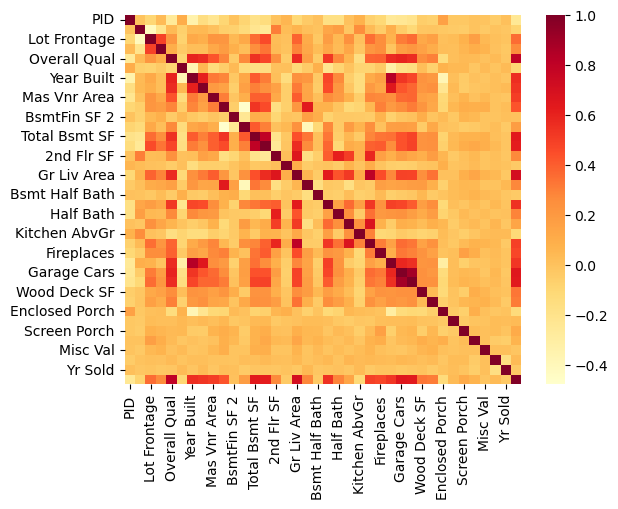

In [137]:
sns.heatmap(df.corr(),cmap='YlOrRd')

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

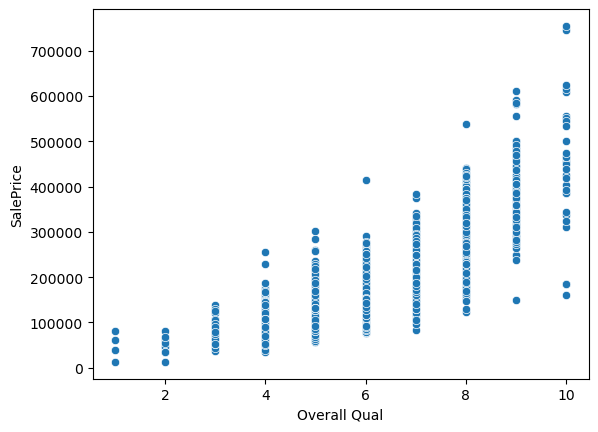

In [138]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [139]:
df[(df['SalePrice']<=250000) & (df['Overall Qual']>9)].index

Int64Index([1498, 2180, 2181], dtype='int64')

In [140]:
df = df.drop([1498,2180,2181],axis=0)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

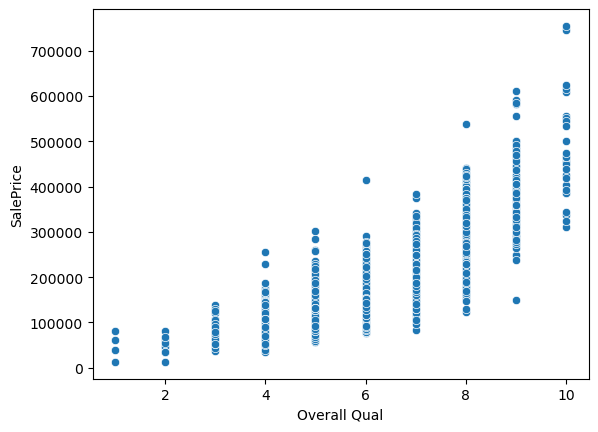

In [141]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

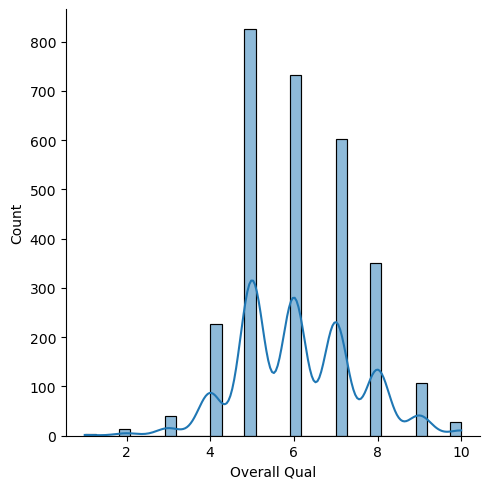

In [142]:
sns.displot(df['Overall Qual'],kde=True)


In [143]:
df= df.set_index('PID')


In [144]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [145]:
def percent_missing(df):
    percent_nan = 100*((df.isnull().sum())/len(df))
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending=False)
    
    return percent_nan

In [146]:
percent_nan = percent_missing(df)

(0.0, 1.0)

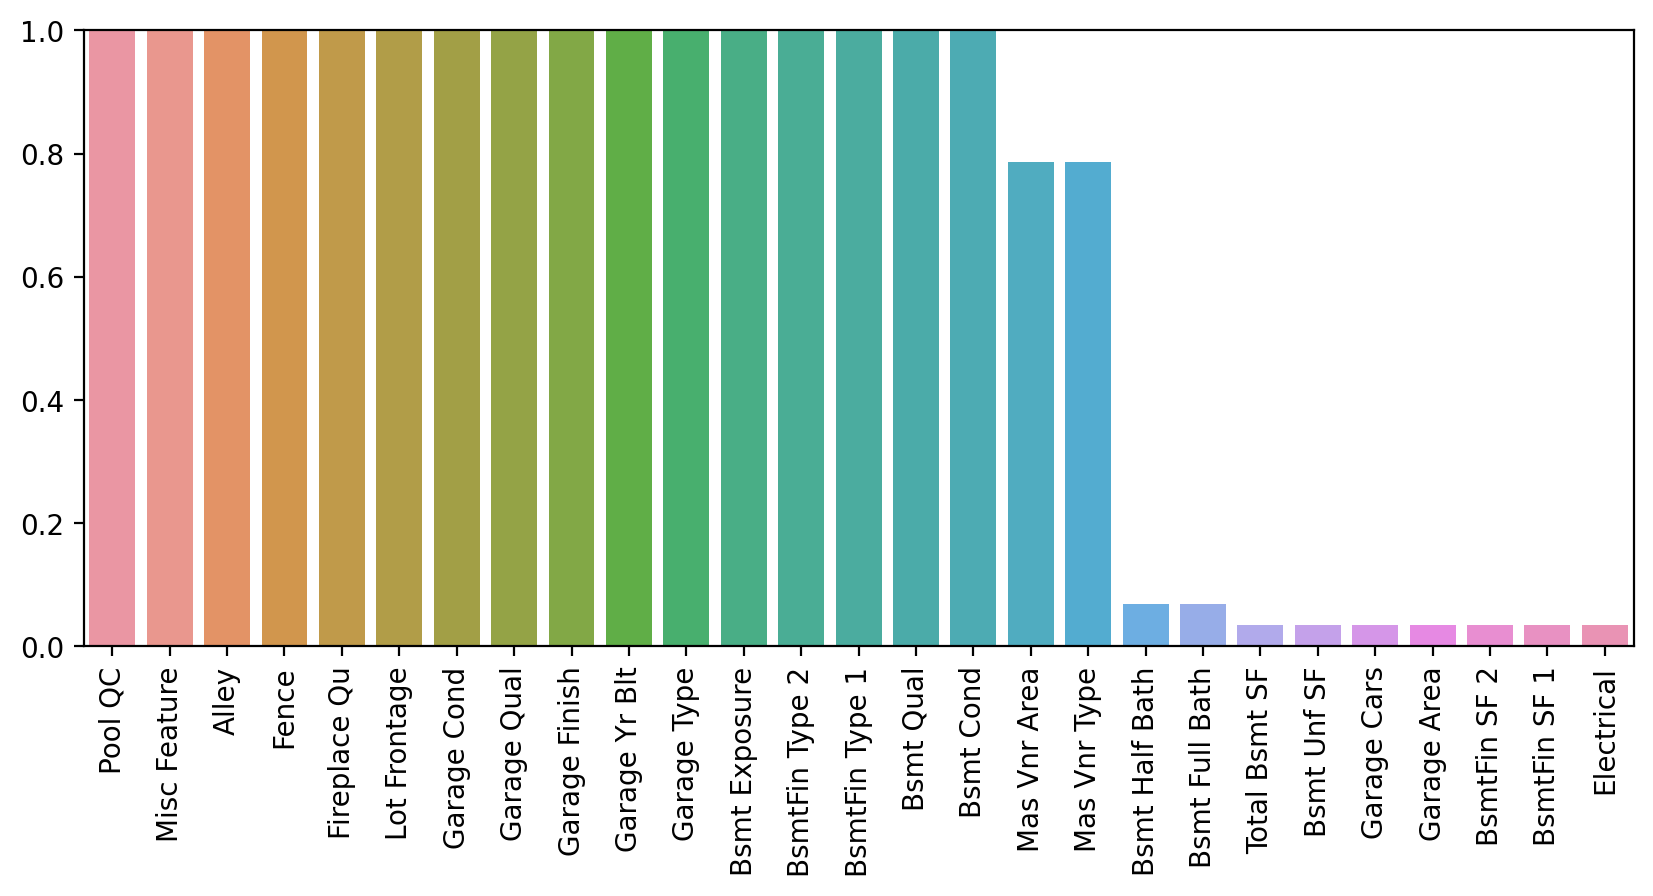

In [147]:
plt.figure(figsize=(10,4),dpi=200)
plt.xticks(rotation=90)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.ylim(0,1)

In [148]:
lst = list(percent_nan[percent_nan<1].index)
lst

['Mas Vnr Area',
 'Mas Vnr Type',
 'Bsmt Half Bath',
 'Bsmt Full Bath',
 'Total Bsmt SF',
 'Bsmt Unf SF',
 'Garage Cars',
 'Garage Area',
 'BsmtFin SF 2',
 'BsmtFin SF 1',
 'Electrical']

In [149]:
df = df.dropna(subset = lst,axis=0)

In [150]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [151]:
percent_nan = percent_missing(df)
lst = list(percent_nan[percent_nan<1].index)
lst

[]

<AxesSubplot:>

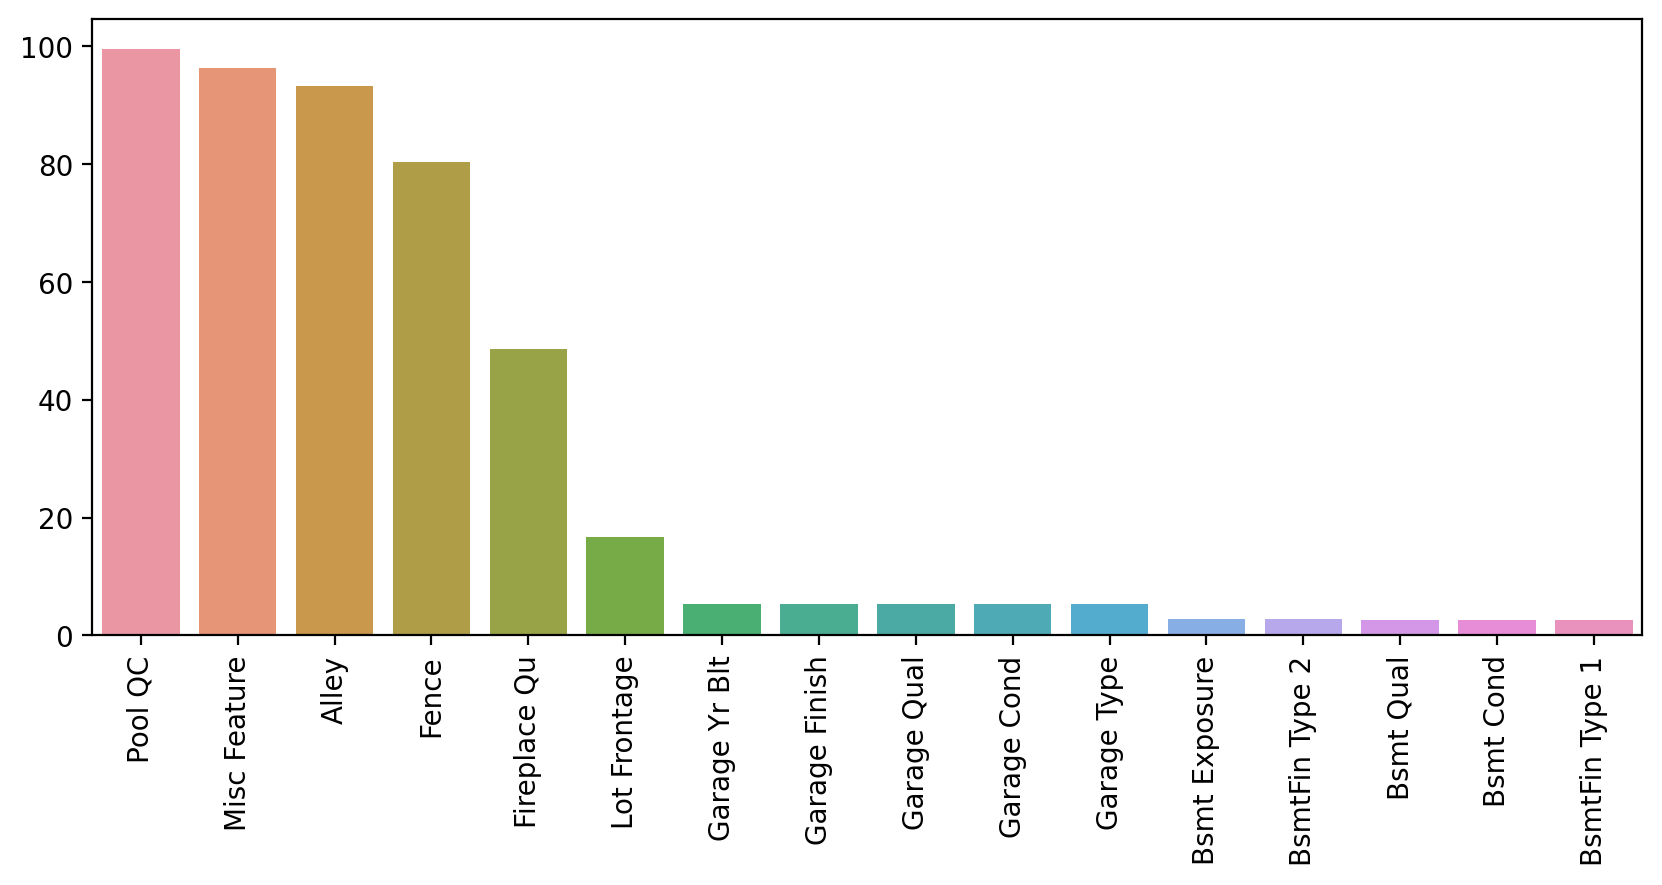

In [152]:
plt.figure(figsize=(10,4),dpi=200)
plt.xticks(rotation=90)
sns.barplot(x=percent_nan.index,y=percent_nan)


In [153]:
percent_nan

Pool QC           99.586207
Misc Feature      96.379310
Alley             93.241379
Fence             80.344828
Fireplace Qu      48.620690
Lot Frontage      16.689655
Garage Yr Blt      5.413793
Garage Finish      5.413793
Garage Qual        5.413793
Garage Cond        5.413793
Garage Type        5.379310
Bsmt Exposure      2.793103
BsmtFin Type 2     2.724138
Bsmt Qual          2.689655
Bsmt Cond          2.689655
BsmtFin Type 1     2.689655
dtype: float64

In [154]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [155]:
df['Garage Yr Blt']= df['Garage Yr Blt'].fillna(0)


In [156]:
percent_nan= percent_missing(df)

In [157]:
percent_nan


Pool QC           99.586207
Misc Feature      96.379310
Alley             93.241379
Fence             80.344828
Fireplace Qu      48.620690
Lot Frontage      16.689655
Bsmt Exposure      2.793103
BsmtFin Type 2     2.724138
Bsmt Qual          2.689655
Bsmt Cond          2.689655
BsmtFin Type 1     2.689655
dtype: float64

In [158]:
df[['Bsmt Exposure','BsmtFin Type 2','Bsmt Qual','Bsmt Cond','BsmtFin Type 1']].dtypes


Bsmt Exposure     object
BsmtFin Type 2    object
Bsmt Qual         object
Bsmt Cond         object
BsmtFin Type 1    object
dtype: object

In [159]:
bsmt_str_cols = ['Bsmt Exposure','BsmtFin Type 2','Bsmt Qual','Bsmt Cond','BsmtFin Type 1']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')


In [160]:
percent_nan= percent_missing(df)
percent_nan

Pool QC         99.586207
Misc Feature    96.379310
Alley           93.241379
Fence           80.344828
Fireplace Qu    48.620690
Lot Frontage    16.689655
dtype: float64

In [161]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [162]:
percent_nan= percent_missing(df)
percent_nan

Fireplace Qu    48.620690
Lot Frontage    16.689655
dtype: float64

In [163]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')


In [164]:
percent_nan= percent_missing(df)
percent_nan

Lot Frontage    16.689655
dtype: float64

In [165]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.329787
ClearCr    88.150000
CollgCr    71.325688
Crawfor    69.951807
Edwards    64.398844
Gilbert    74.345455
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    83.925466
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.704762
Somerst    64.111111
StoneBr    62.173913
Timber     81.545455
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [166]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].apply(lambda val: val.fillna(val.mean()))


In [167]:
percent_nan= percent_missing(df)
percent_nan

Lot Frontage    0.103448
dtype: float64

In [168]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [169]:
df.head()['Lot Frontage']

PID
526301100    141.0
526350040     80.0
526351010     81.0
526353030     93.0
527105010     74.0
Name: Lot Frontage, dtype: float64

In [170]:
obj_df = df.select_dtypes(include='object')

In [171]:
obj_df.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
PID,,,,,,,,,,,,,,,,,,,,,
526301100,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
526350040,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
526351010,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
526353030,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
527105010,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


In [172]:
num_df = df.select_dtypes(exclude='object')
num_df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,215000
526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,105000
526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,172000
526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,244000
527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,189900


In [173]:
obj_df_dummies = pd.get_dummies(obj_df,drop_first=True)

In [174]:
obj_df_dummies.head(2)

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,,,,,,,
526301100,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
526350040,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [175]:
final_df = pd.concat([num_df,obj_df_dummies],axis=1)

In [176]:
final_df.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,,,,,,,
526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [177]:
final_df.shape

(2900, 260)

In [178]:
X = final_df.drop(['SalePrice'],axis=1)
y = final_df['SalePrice']

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [181]:
model = LinearRegression()

In [182]:
for_sel = SequentialFeatureSelector(model,k_features = 20, forward=True, scoring='r2')

In [183]:
for_sel.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(20, 20),
                          scoring='r2')

In [184]:
selected_indices = [idx for idx in for_sel.k_feature_idx_ if idx < len(final_df.columns)]
selected_features = final_df.columns[selected_indices]
print("Selected features using forward selection:")
print(selected_indices)
print(selected_features)

Selected features using forward selection:
[0, 2, 3, 4, 5, 6, 7, 8, 11, 15, 20, 26, 46, 62, 74, 75, 81, 169, 178, 250]
Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       'Gr Liv Area', 'Bedroom AbvGr', 'Garage Area', 'Lot Shape_Reg',
       'Neighborhood_CollgCr', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_Somerst', 'Bsmt Qual_Fa', 'Bsmt Cond_TA',
       'Sale Type_ConLw'],
      dtype='object')


In [185]:
final_df = final_df[selected_features]

In [186]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [187]:
### Feature Selection using chi-squared

# create a SelectKBest object with chi-squared scoring function
skb_chi2 = SelectKBest(score_func=chi2, k=20)

In [188]:
# fit the SelectKBest object to the data
X_chi2 = skb_chi2.fit_transform(X_train,y_train)

In [189]:
# Create a new DataFrame with selected features
X_selected = skb_chi2.transform(X_train)
selected_df = pd.DataFrame(X_selected, columns=X_train.columns[skb_chi2.get_support()])

# Print the selected feature names
print("Selected features using chi-squared:")
print(selected_df.columns)

Selected features using chi-squared:
Index(['MS SubClass', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Yr Blt',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val'],
      dtype='object')


In [190]:
final_df.columns


Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       'Gr Liv Area', 'Bedroom AbvGr', 'Garage Area', 'Lot Shape_Reg',
       'Neighborhood_CollgCr', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_Somerst', 'Bsmt Qual_Fa', 'Bsmt Cond_TA',
       'Sale Type_ConLw'],
      dtype='object')

In [191]:
X = final_df.copy()

In [192]:
X.columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       'Gr Liv Area', 'Bedroom AbvGr', 'Garage Area', 'Lot Shape_Reg',
       'Neighborhood_CollgCr', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_Somerst', 'Bsmt Qual_Fa', 'Bsmt Cond_TA',
       'Sale Type_ConLw'],
      dtype='object')

In [193]:
X.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Garage Area,Lot Shape_Reg,Neighborhood_CollgCr,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_Somerst,Bsmt Qual_Fa,Bsmt Cond_TA,Sale Type_ConLw
PID,,,,,,,,,,,,,,,,,,,,
526301100,20,31770,6,5,1960,1960,112.0,639.0,1080.0,1656,3,528.0,0,0,0,0,0,0,0,0
526350040,20,11622,5,6,1961,1961,0.0,468.0,882.0,896,2,730.0,1,0,0,0,0,0,1,0
526351010,20,14267,6,6,1958,1958,108.0,923.0,1329.0,1329,3,312.0,0,0,0,0,0,0,1,0
526353030,20,11160,7,5,1968,1968,0.0,1065.0,2110.0,2110,3,522.0,1,0,0,0,0,0,1,0
527105010,60,13830,5,5,1997,1998,0.0,791.0,928.0,1629,3,482.0,0,0,0,0,0,0,1,0


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [195]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler fit on the training data
X_test_scaled = scaler.transform(X_test)

# Create a linear regression object
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test_scaled)


In [196]:
from sklearn.metrics import r2_score
# calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.8630842624429663


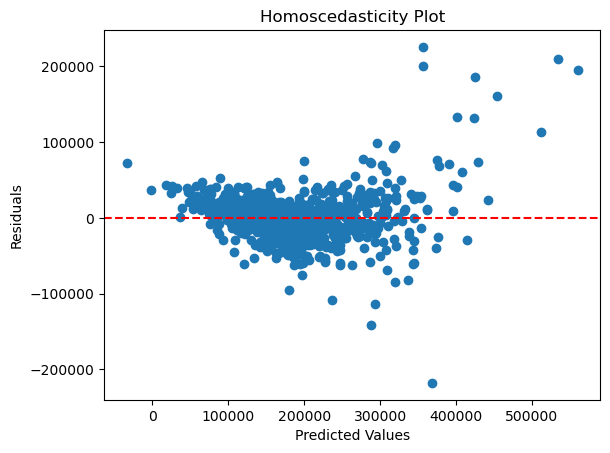

In [197]:
# calculate the residuals
residuals = y_test - y_pred

# plot residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Plot')
plt.show()

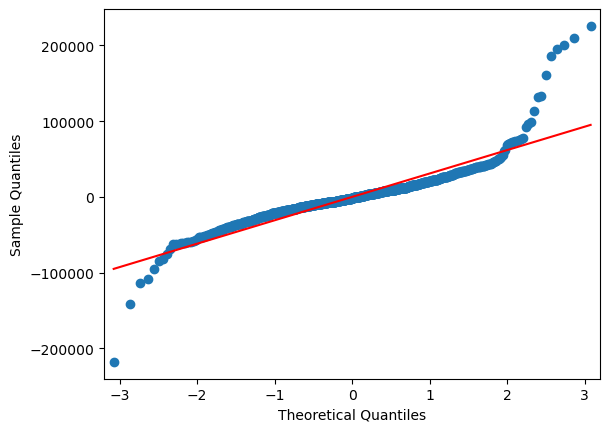

In [198]:
import statsmodels.api as sm
fig = sm.qqplot(residuals, line='s')
plt.show()

In [199]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

In [200]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.impute import SimpleImputer

In [201]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [222]:
X = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [224]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

In [216]:
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score -1.1077719913390057e+22
MAE 543342780953675.44


In [225]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),cat_cols)
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9112675709575605
MAE 15527.463827888689


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [9, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [228]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),cat_cols)
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [9, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


R2 score 0.6722722721462258
MAE 29655.069313827935


In [229]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),cat_cols)
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8367778062207831
MAE 22046.59688930858


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [9, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [230]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),cat_cols)
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8804982218601857
MAE 15994.508255653927


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [9, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [233]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),cat_cols)
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

NameError: name 'VotingRegressor' is not defined